In [14]:
import pathlib
import os

import geopandas as gpd
import rasterio

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
cwd = pathlib.Path.cwd().parent.parent
building_footprints_shp_dir = cwd / "data" / "buildings-footprints-roi"
building_footprints_shp_dir

PosixPath('/Users/sashikanth/Documents/sushi/sushi_personal/sandmining_prediction/eye-for-detail/data/buildings-footprints-roi')

In [17]:
# Sometimes takes long
shapefile = gpd.read_file(building_footprints_shp_dir)

In [18]:
shapefile.crs

<Projected CRS: EPSG:32620>
Name: WGS 84 / UTM zone 20N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 66°W and 60°W, northern hemisphere between equator and 84°N, onshore and offshore. Anguilla. Antigua and Barbuda. Bermuda. Brazil. British Virgin Islands. Canada - New Brunswick; Labrador; Nova Scotia; Nunavut; Prince Edward Island; Quebec. Dominica. Greenland. Grenada. Guadeloupe. Guyana. Martinique. Montserrat. Puerto Rico. St Kitts and Nevis. St Barthelemy. St Lucia. St Maarten, St Martin. St Vincent and the Grenadines. Trinidad and Tobago. Venezuela. US Virgin Islands.
- bounds: (-66.0, 0.0, -60.0, 84.0)
Coordinate Operation:
- name: UTM zone 20N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

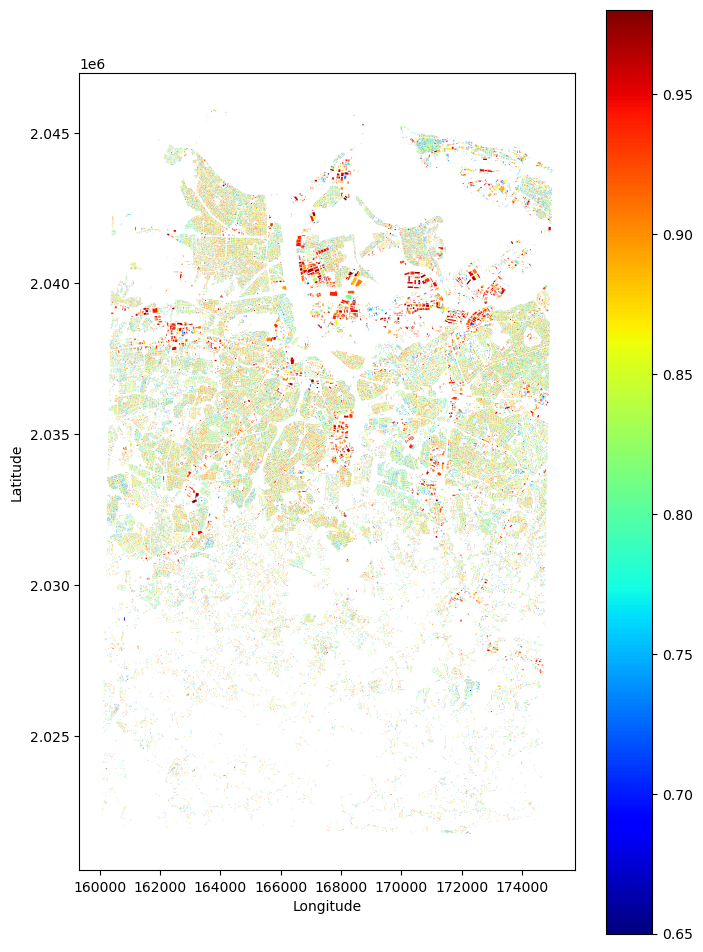

In [19]:
fig, ax = plt.subplots(1, figsize=(8, 12))
shapefile.plot(ax=ax, column="confidence", cmap="jet", legend=True)
# shapefile.plot(ax=ax, cmap="jet", legend=True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [20]:
shapefile.crs

<Projected CRS: EPSG:32620>
Name: WGS 84 / UTM zone 20N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 66°W and 60°W, northern hemisphere between equator and 84°N, onshore and offshore. Anguilla. Antigua and Barbuda. Bermuda. Brazil. British Virgin Islands. Canada - New Brunswick; Labrador; Nova Scotia; Nunavut; Prince Edward Island; Quebec. Dominica. Greenland. Grenada. Guadeloupe. Guyana. Martinique. Montserrat. Puerto Rico. St Kitts and Nevis. St Barthelemy. St Lucia. St Maarten, St Martin. St Vincent and the Grenadines. Trinidad and Tobago. Venezuela. US Virgin Islands.
- bounds: (-66.0, 0.0, -60.0, 84.0)
Coordinate Operation:
- name: UTM zone 20N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Rasterize Vectors with Rasterio

In [20]:
from rasterio import features
import numpy as np
from rasterio.enums import MergeAlg
import earthpy as ep
import earthpy.plot as eplt
from rasterio.warp import calculate_default_transform, reproject, Resampling
from shapely.geometry import shape

In [21]:
pre_event_raster_path = cwd / "data" / "Pre_Event_San_Juan.tif"
post_event_raster_path = cwd / "data" / "Post_Event_San_Juan.tif"


def rasterize(raster_path, shapefile):
        with rasterio.open(raster_path, "r") as src:
                # Get the CRS of the raster
                raster_crs = src.crs

                # Reproject the geometries
                shapefile = shapefile.to_crs(raster_crs)

                # Get list of geometries for all features in vector file
                geom = [shapes for shapes in shapefile.geometry]

                # Rasterize vector using the shape and coordinate system of the raster
                rasterized = features.rasterize(geom,
                                                out_shape = src.shape,
                                                fill = 0,
                                                out = None,
                                                transform = src.transform,
                                                all_touched = True,
                                                merge_alg=MergeAlg.add,
                                                default_value = 255,
                                                dtype = None)
                return rasterized

post_event_raster = rasterize(raster_path=post_event_raster_path, shapefile=shapefile)


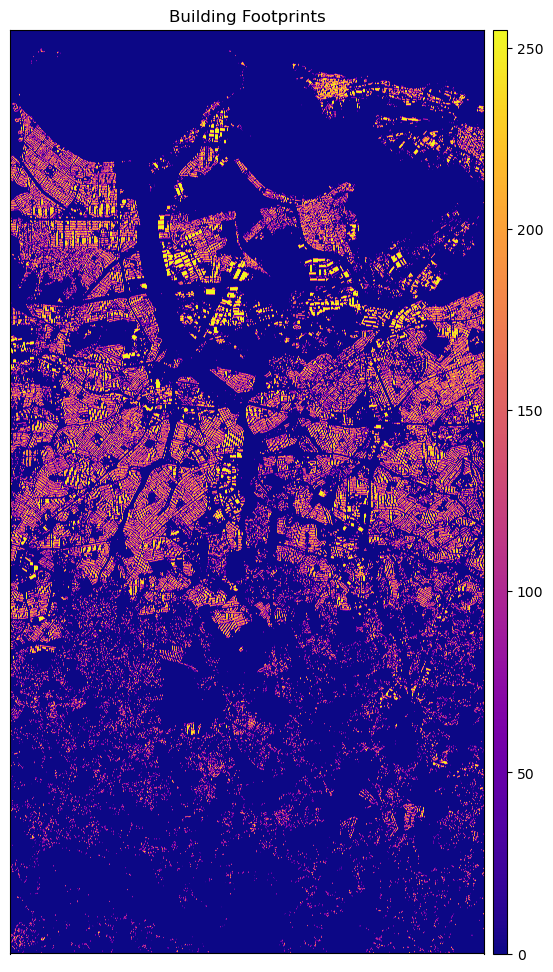

In [85]:
# Plot your data using earthpy
eplt.plot_bands(post_event_raster,
              title="Building Footprints",
              cmap="plasma")

plt.show()

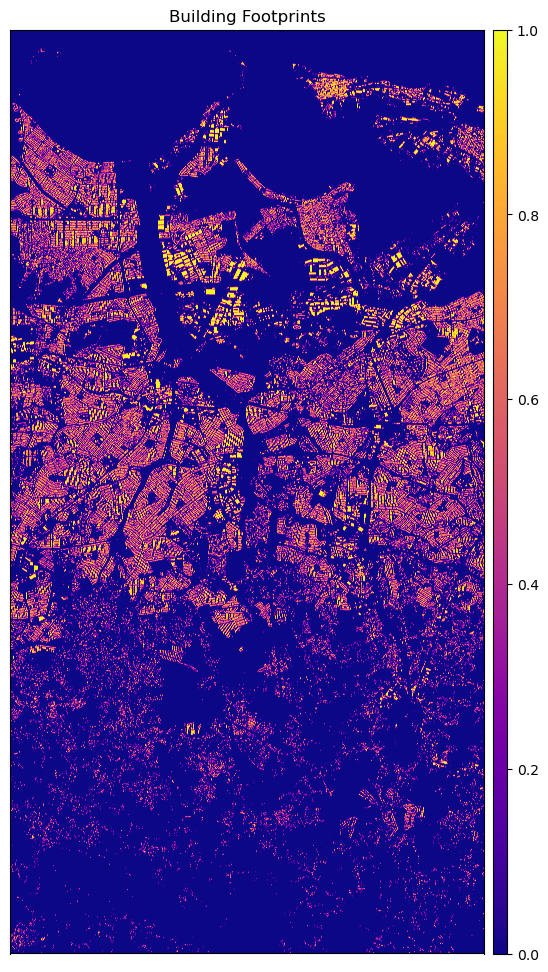

In [86]:
eplt.plot_bands(post_event_raster > 0,
              title="Building Footprints",
              cmap="plasma")

plt.show()

In [13]:
post_event_raster

NameError: name 'post_event_raster' is not defined

In [23]:
shapefile.crs

<Projected CRS: EPSG:32620>
Name: WGS 84 / UTM zone 20N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 66°W and 60°W, northern hemisphere between equator and 84°N, onshore and offshore. Anguilla. Antigua and Barbuda. Bermuda. Brazil. British Virgin Islands. Canada - New Brunswick; Labrador; Nova Scotia; Nunavut; Prince Edward Island; Quebec. Dominica. Greenland. Grenada. Guadeloupe. Guyana. Martinique. Montserrat. Puerto Rico. St Kitts and Nevis. St Barthelemy. St Lucia. St Maarten, St Martin. St Vincent and the Grenadines. Trinidad and Tobago. Venezuela. US Virgin Islands.
- bounds: (-66.0, 0.0, -60.0, 84.0)
Coordinate Operation:
- name: UTM zone 20N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:
print(list(shapefile.iloc[0, :].geometry.exterior.coords))

[(167578.5108706173, 2042703.1337979182), (167575.73399842688, 2042703.1463583289), (167575.75622103293, 2042708.059323), (167578.5330932481, 2042708.0467623794), (167578.5108706173, 2042703.1337979182)]
